In [5]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib notebook

In [2]:
# Read the CSV file into a DataFrame: df
points = pd.read_csv('seed.csv')
samples = pd.read_csv('seeds-width-vs-length.csv')
grains=pd.read_csv('seeds.csv')

# Clustering 2D points

In [3]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(samples)

# Print cluster labels of new_points
print(labels)


[1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 2 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 2 2 2 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 2 0 0
 2 0 0 0 2 2 2 2 0 0 2 0 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0
 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 2 2 0 2 0]


# Inspect clustering

<IPython.core.display.Javascript object>


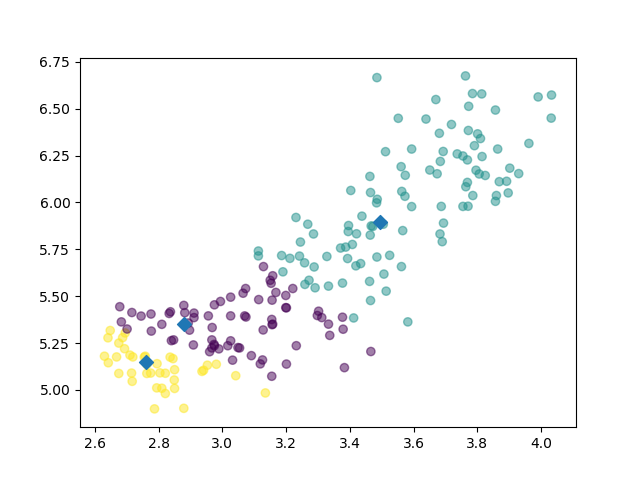

In [6]:
# Assign the columns of new_points: xs and ys
xs =samples.iloc[:,0].values
ys =samples.iloc[:,1].values

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

# Evaluating a clustering

<IPython.core.display.Javascript object>


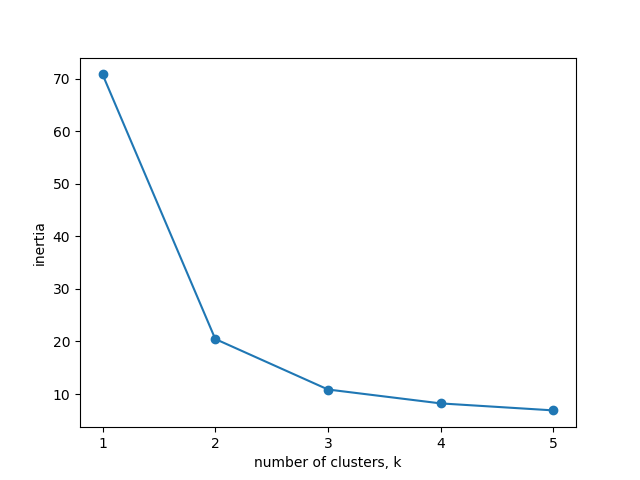

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias.
    inertias.append(model.inertia_)  #Inertia measures clustering quality.Measures how spread out the clusters are (lower is better) 
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


# Evaluating the grain clustering 

In [8]:
samples.head()
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)


print(labels)

[2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2 1
 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1 1
 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Correlated data in nature

<IPython.core.display.Javascript object>


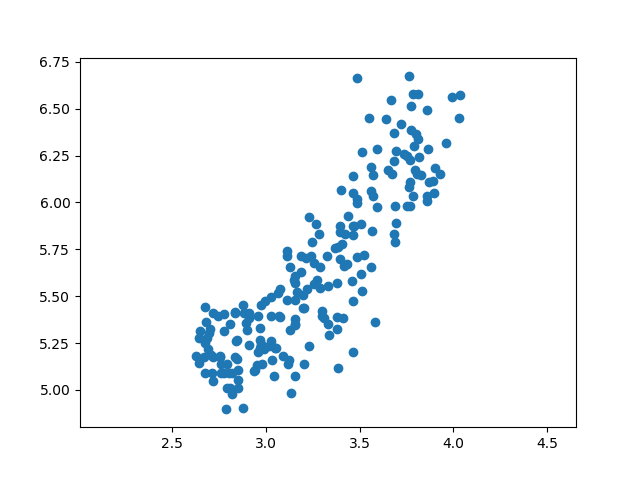

0.8604405325922295


In [9]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = samples.iloc[:,0].values

# Assign the 1st column of grains: length
length =samples.iloc[:,1].values

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue =pearsonr(width, length)

# Display the correlation
plt.show()
print(correlation)

# Decorrelating the grain measurements with PCA

<IPython.core.display.Javascript object>


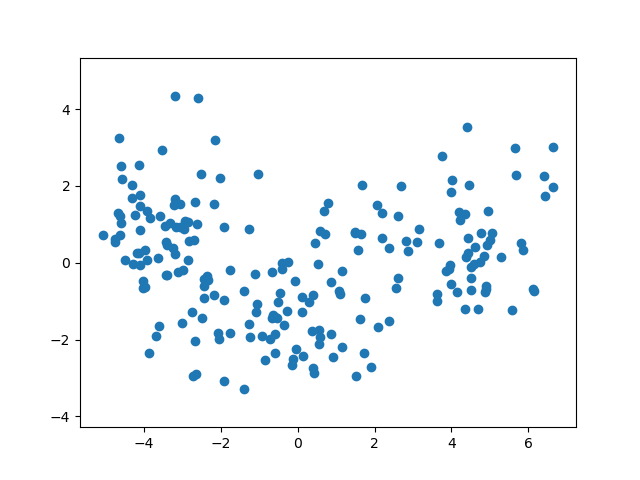

0.0


In [10]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)


# The first principal component

<IPython.core.display.Javascript object>


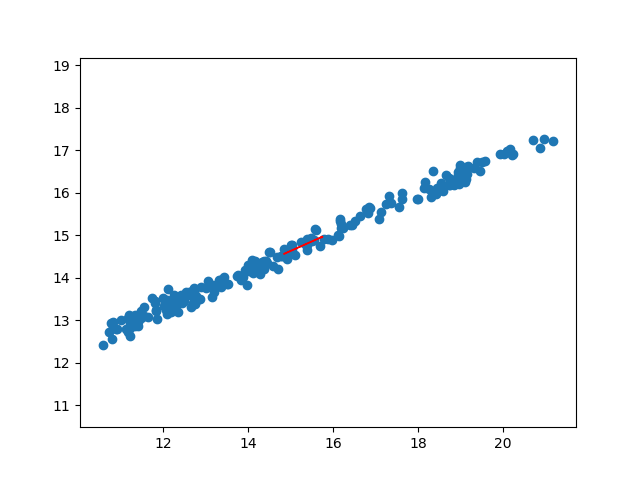

In [11]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0].values, grains.iloc[:,1].values)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

# Variance of the PCA features

<IPython.core.display.Javascript object>


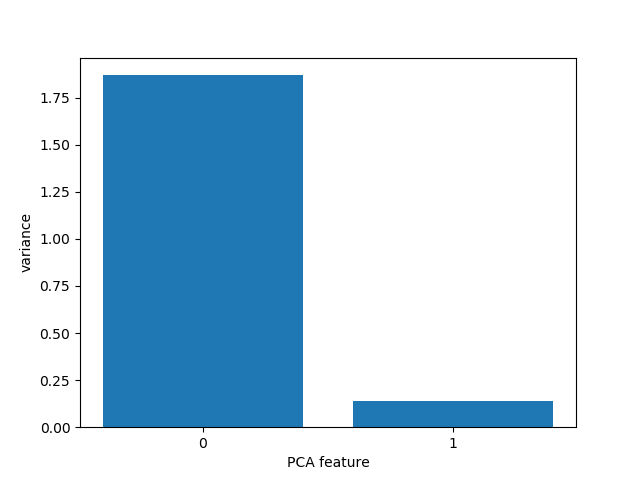

In [12]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler =StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


# Dimension reduction 

In [13]:
x = grains.values

scaler = StandardScaler()

scaled_grains = scaler.fit_transform(x)


# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_grains)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_grains)

# Print the shape of pca_features
print(pca_features.shape)

(209, 2)
